In [1]:
import pandas as pd
import os


In [3]:
os.getcwd()

'C:\\Users\\el28501'

In [4]:
movies = pd.read_csv("c://Users//el28501//Documents//DataScience//Movie-Ratings.csv")

In [5]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [6]:
len(movies)

559

In [7]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [8]:
movies.columns=['Film', 'Genre', 'CriticRating', 'AudienceRating',\
               'BudgetMillions', 'Year']

In [9]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [12]:
movies.Film =  movies.Film.astype('category')

In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: category(1), int64(4), object(1)
memory usage: 47.4+ KB


In [14]:
movies.Genre =  movies.Genre.astype('category')
movies.Year =  movies.Year.astype('category')

In [15]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [16]:
# get unique values columns

In [17]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


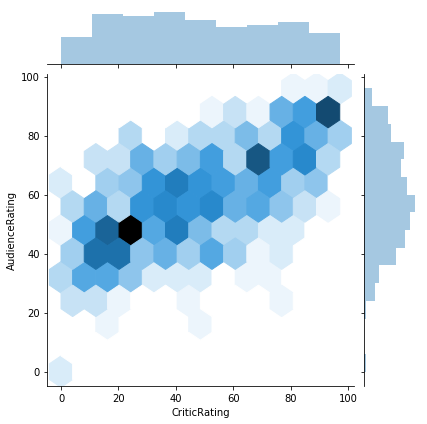

In [19]:
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='hex')

---

In [20]:
#histograms

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

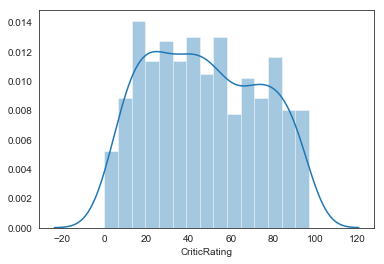

In [22]:
sns.set_style("white")
ja = sns.distplot(movies.CriticRating, bins=15)

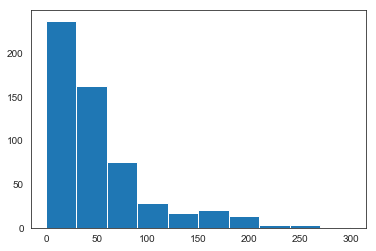

In [24]:
plt.hist(movies.BudgetMillions)
plt.show()

([array([ 9., 39., 24., 13., 16.,  9.,  8., 14.,  5.,  4.,  8.,  2.,  2.,
          0.,  1.]),
  array([48., 80., 35., 19., 18., 10.,  8., 15.,  5.,  4.,  8.,  2.,  2.,
          0.,  1.])],
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
        220., 240., 260., 280., 300.]),
 <a list of 2 Lists of Patches objects>)

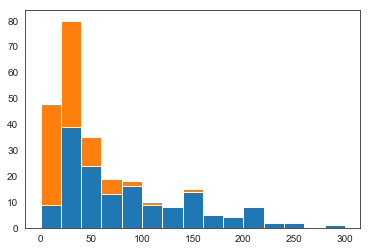

In [27]:
plt.hist([movies[movies.Genre == 'Action'].BudgetMillions,\
          movies[movies.Genre == 'Drama'].BudgetMillions], bins=15, stacked=True)

In [28]:
#for

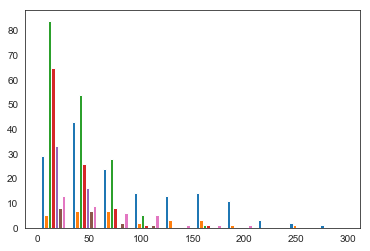

In [51]:
list1 = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions) 
    mylabels.append(gen)
    
h = plt.hist(list1)

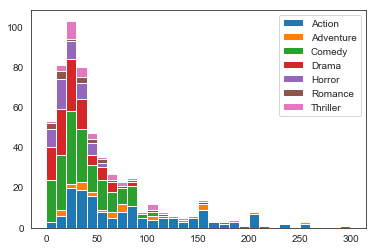

In [57]:
h= plt.hist(list1, bins=30, stacked=True, rwidth=10, label=mylabels)
plt.legend()
plt.show()

In [ ]:
#KDE    kernel density estimate plot

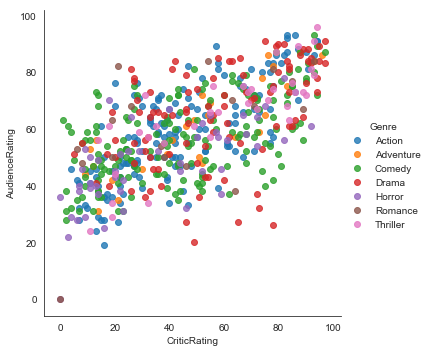

In [61]:
vis1 = sns.lmplot(data =  movies, x ='CriticRating', y='AudienceRating',\
                 fit_reg=False, hue='Genre')

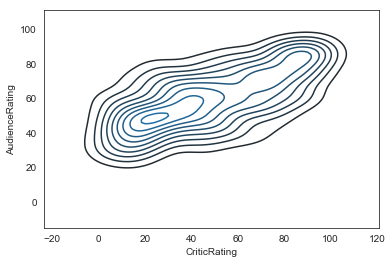

In [62]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating)

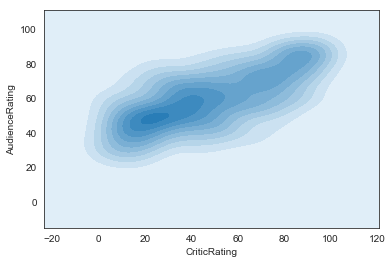

In [63]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True)

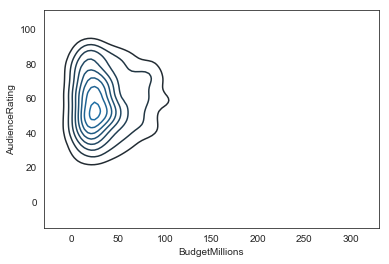

In [67]:
K1 =  sns.kdeplot(movies.BudgetMillions, movies.AudienceRating);

[(-20, 260)]

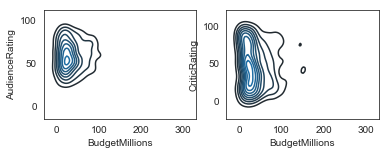

In [78]:
f, axes = plt.subplots(1,2, figsize=(6,2))
K1 =  sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0]);
K2 =  sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1]);
k1.set(xlim=(-20,260))

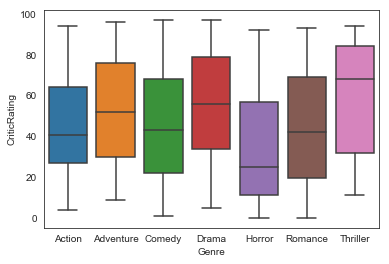

In [79]:
 w =sns.boxplot(data = movies, x= 'Genre', y= 'CriticRating')

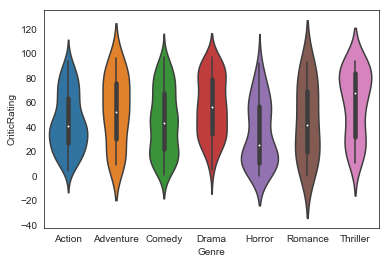

In [80]:
 w=sns.violinplot(data=movies, x='Genre', y='CriticRating')

In [81]:
# facet

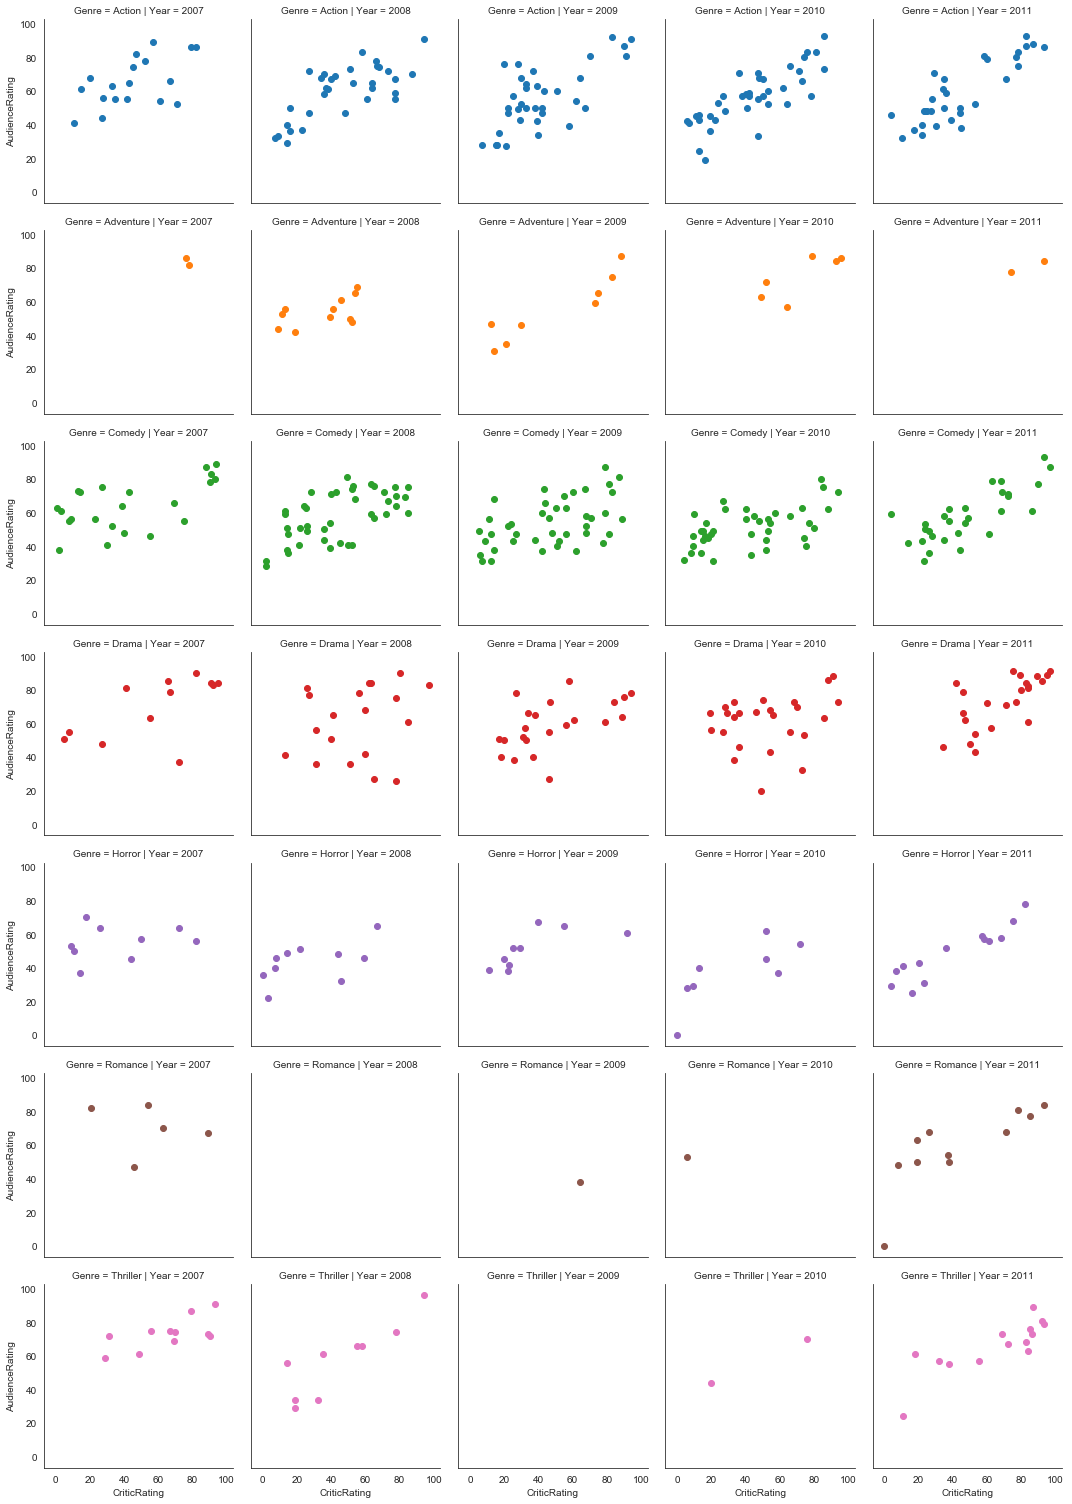

In [84]:
g = sns.FacetGrid(movies, row='Genre', col ='Year', hue = 'Genre')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating')

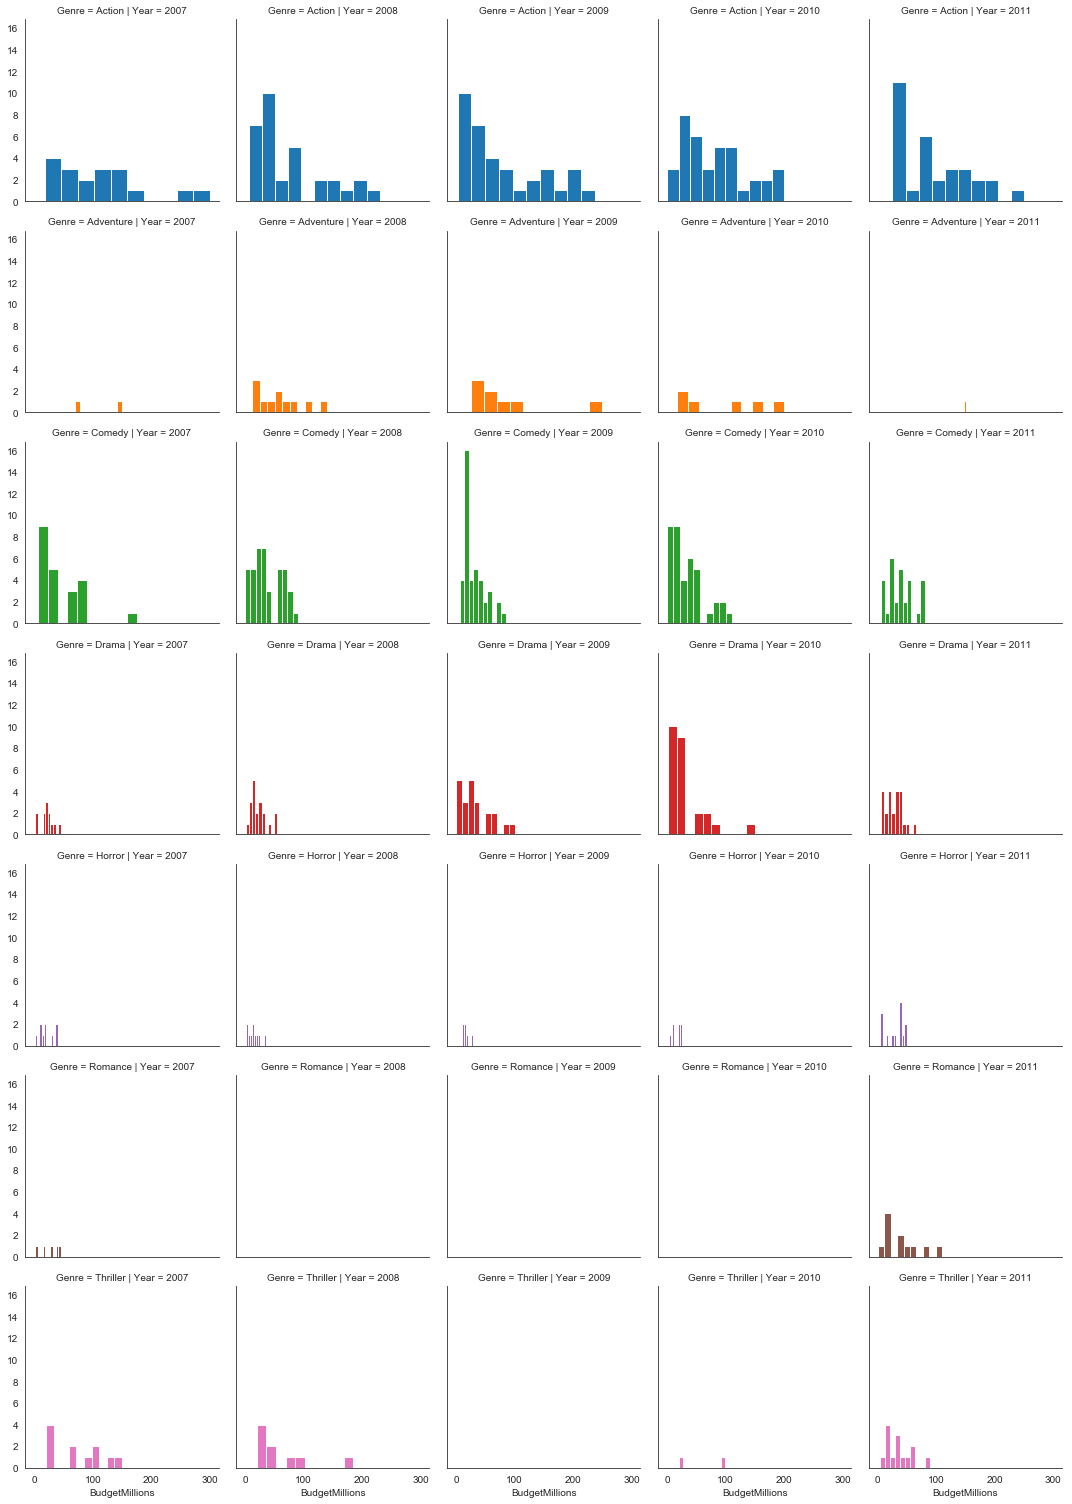

In [86]:
g = sns.FacetGrid(movies, row='Genre', col ='Year', hue = 'Genre')
g = g.map(plt.hist, 'BudgetMillions')

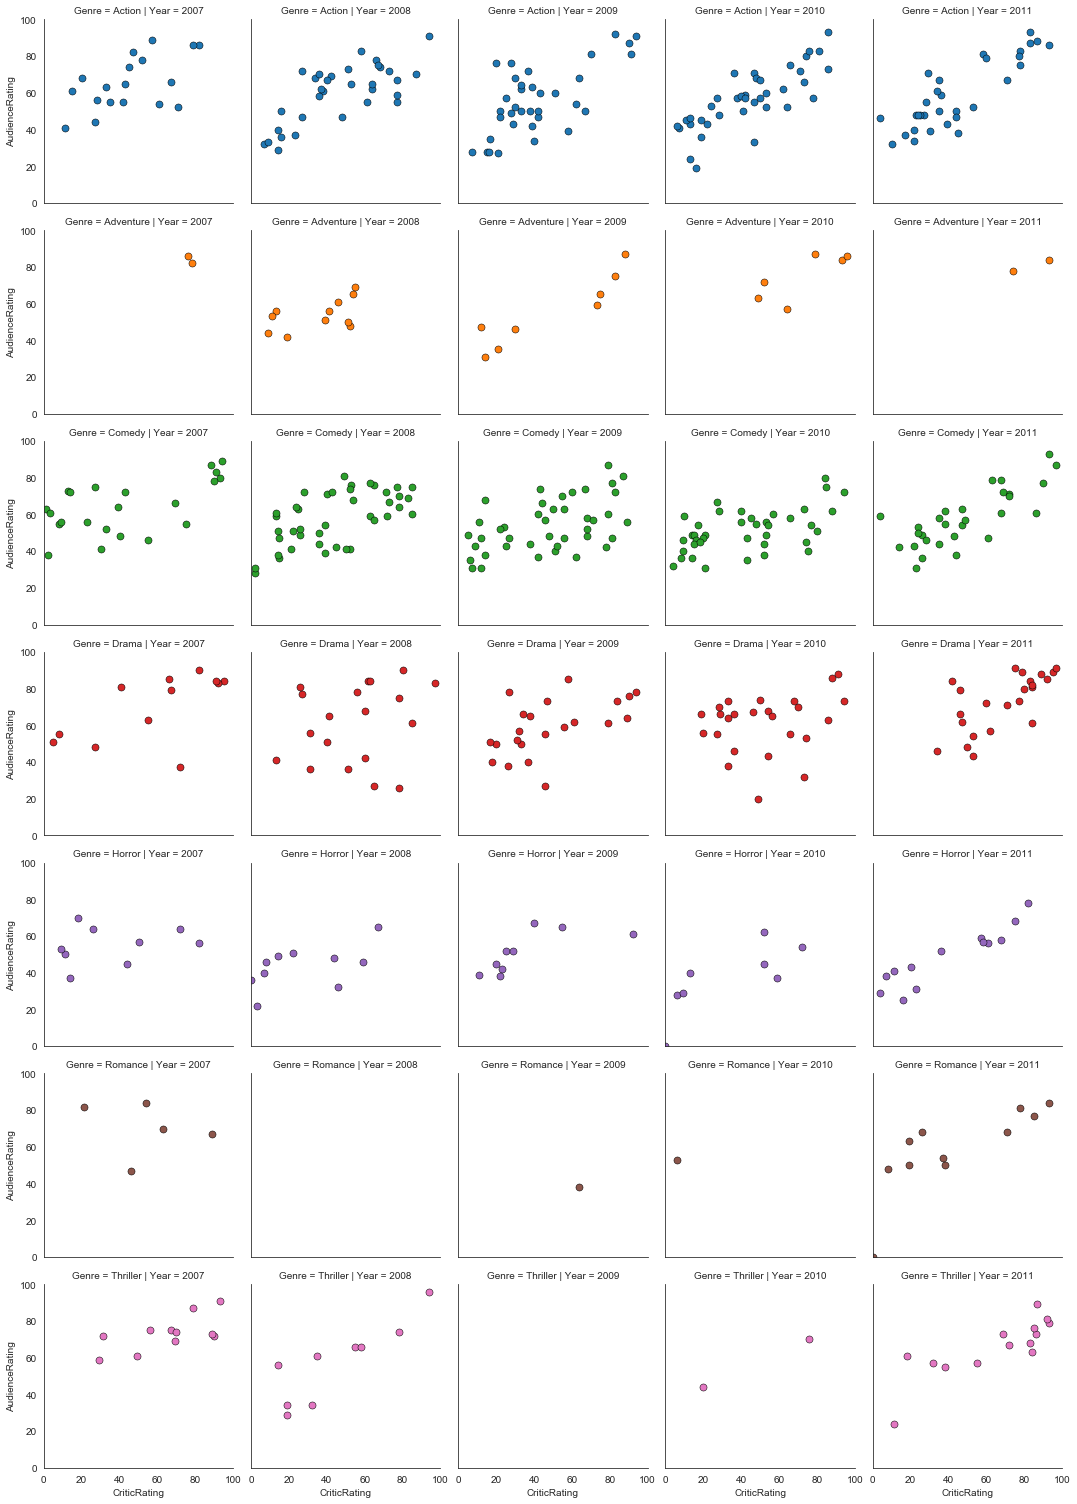

In [88]:
g = sns.FacetGrid(movies, row='Genre', col ='Year', hue = 'Genre')
kws =  dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
g.set(xlim=(0, 100), ylim=(0,100))


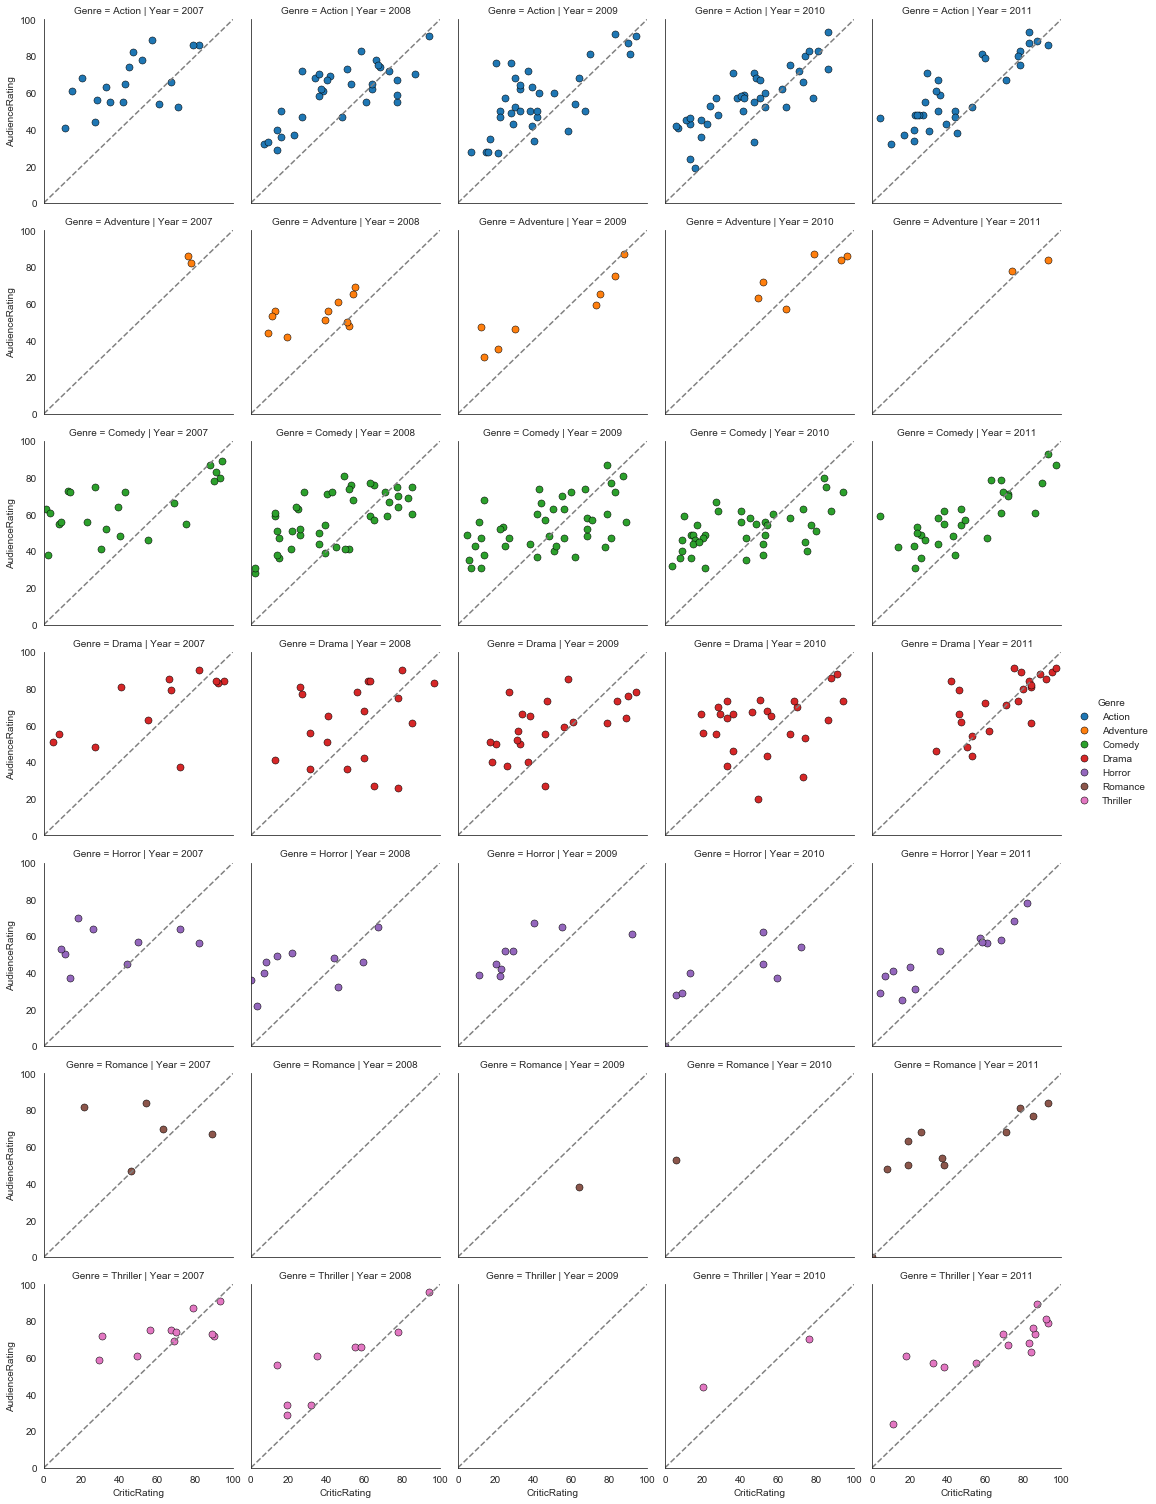

In [92]:
g = sns.FacetGrid(movies, row='Genre', col ='Year', hue = 'Genre')
kws =  dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
g.set(xlim=(0, 100), ylim=(0,100))
g.add_legend()
for ax in g.axes.flat:
    ax.plot((0,100), (0,100), c='gray', ls='--')



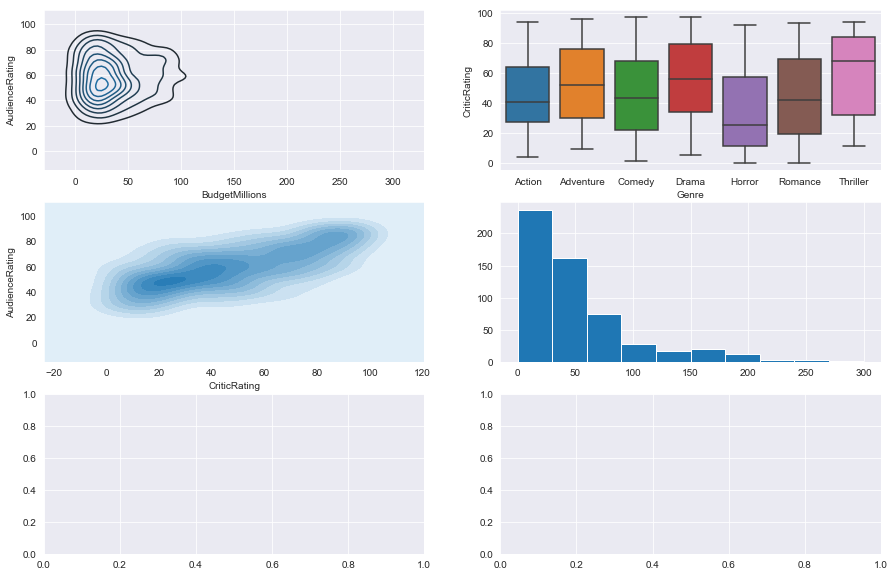

In [144]:
sns.set_style("darkgrid")
f, axes = plt.subplots(3,2, figsize=(15,10))

K1 =  sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0, 0])

k2 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, ax=axes[1,0])

k3 = sns.boxplot(data = movies, x= 'Genre', y= 'CriticRating', ax=axes[0,1])

axes[1,1].hist(movies.BudgetMillions)

k1.set(xlim=(-20,260))
#k2.set(xlim=(-20,260))
#k3.set(xlim=(-20,260))


plt.show()

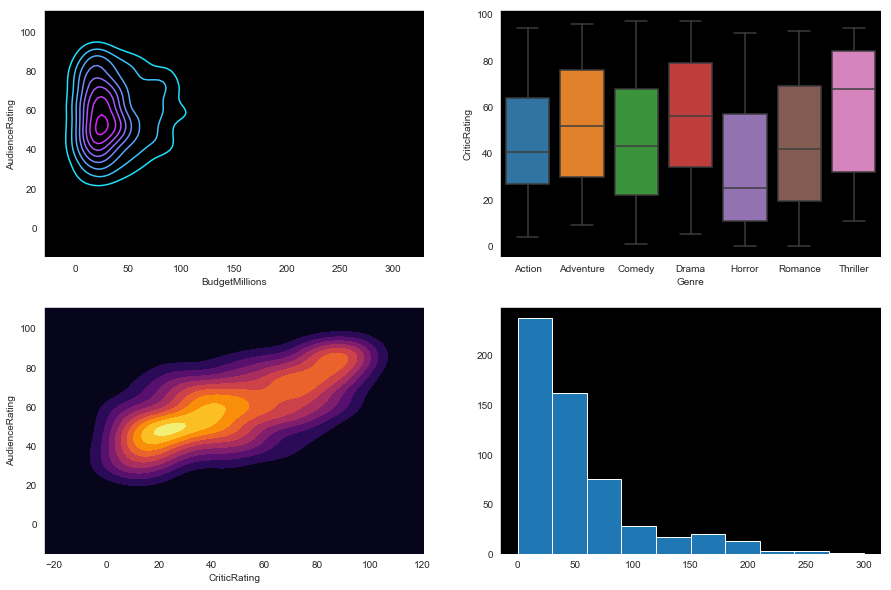

In [164]:
sns.set_style("dark", {"axes.facecolor":"black"})
f, axes = plt.subplots(2,2, figsize=(15,10))

K1 =  sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, cmap='cool', ax=axes[0, 0])

k2 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, cmap='inferno', ax=axes[1,0])

k3 = sns.boxplot(data = movies, x= 'Genre', y= 'CriticRating',  ax=axes[0,1])

axes[1,1].hist(movies.BudgetMillions)

k1.set(xlim=(-20,260))


plt.show()

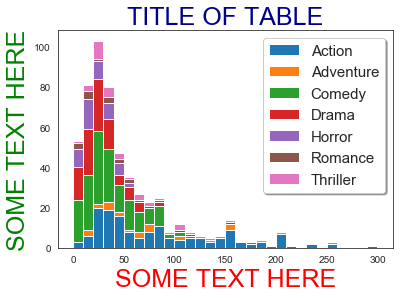

In [172]:
sns.set_style("white")
h= plt.hist(list1, bins=30, stacked=True, rwidth=10, label=mylabels)
plt.legend(prop={'size':15}, shadow=True)
plt.title("TITLE OF TABLE", fontsize=25, color="DarkBlue")
plt.ylabel("SOME TEXT HERE", fontsize=25, color="Green")
plt.xlabel("SOME TEXT HERE", fontsize=25, color="Red")
plt.show()